In [16]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
IMAGE_SIZE = [299, 299]

In [18]:
#Give dataset path
train_path = '/content/drive/MyDrive/FinalYear_Project/swedish_dl/train'
test_path = '/content/drive/MyDrive/FinalYear_Project/swedish_dl/test'

In [19]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [22]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train/*')
len(folders)

15

In [23]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
#model.summary()

In [24]:
from tensorflow.keras import optimizers


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [25]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [26]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train',
                                                 target_size = (299, 299),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 960 images belonging to 15 classes.


In [28]:
train_set.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [29]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/test',
                                            target_size = (299, 299),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 165 images belonging to 15 classes.


In [30]:
test_set.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [31]:
#leaf1:Ulmus carpinifolia
#leaf2:Acer
#leaf3:Salix aurita
#leaf4:Quercus
#leaf5:Alnus incana
#leaf6:Betula pubescens
#leaf7:Salix alba
#leaf8:Populus tremula
#leaf9:Ulmus glabra
#leaf10:Sorbus aucuparia
#leaf11:Salix sinerea
#leaf12:Populus
#leaf13:Tilia
#leaf14:Sorbus intermedia
#leaf15:Fagus silvatica

In [32]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                               cooldown=0,
#                               patience=5,
#                               min_lr=0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/FinalYear_Project/swedish_model/Inceptionmodel.h5', 
                               verbose=1, save_best_only=True)

callbacks= [checkpoint]


start = datetime.now()

history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=5)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/5
192/192 [==============================] - 1653s 9s/step - loss: 172.4290 - accuracy: 0.6302 - val_loss: 70.0391 - val_accuracy: 0.8424
Epoch 2/5
192/192 [==============================] - 114s 594ms/step - loss: 67.2277 - accuracy: 0.8375 - val_loss: 222.2961 - val_accuracy: 0.7030
Epoch 3/5
192/192 [==============================] - 120s 626ms/step - loss: 72.4263 - accuracy: 0.8635 - val_loss: 125.9800 - val_accuracy: 0.8182
Epoch 4/5
192/192 [==============================] - 103s 537ms/step - loss: 39.1749 - accuracy: 0.9167 - val_loss: 43.2772 - val_accuracy: 0.8727
Epoch 5/5
192/192 [==============================] - 100s 519ms/step - loss: 35.1741 - accuracy: 0.9229 - val_loss: 63.5964 - val_accuracy: 0.8667
Training completed in time:  0:35:38.914513


In [35]:
import tensorflow as tf


def plot_model(model):
    return tf.keras.utils.plot_model(
        model=model,
        to_file='/content/drive/MyDrive/FinalYear_Project/Results/InceptionModel.png',
        show_shapes=True,
        show_layer_names=False,
        rankdir='TB',
        expand_nested=True,
        dpi=96
    )

def plot_model_hist(history):
    plt.figure(figsize=(20, 6))
    plt.title('Results')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='orange', label='Training loss')
    plt.plot(history.history['val_loss'], color='red', label='Validation loss')
    plt.legend()
    plt.title(label='Loss')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss Value')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], color='green', label='Validation accuracy')
    plt.legend();
    plt.title(label='Accuracy')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy Value')

    plt.savefig(fname='/content/drive/MyDrive/FinalYear_Project/Results/InceptionModel_history.png', orientation='landscape')


In [36]:
plot_model(model=model)

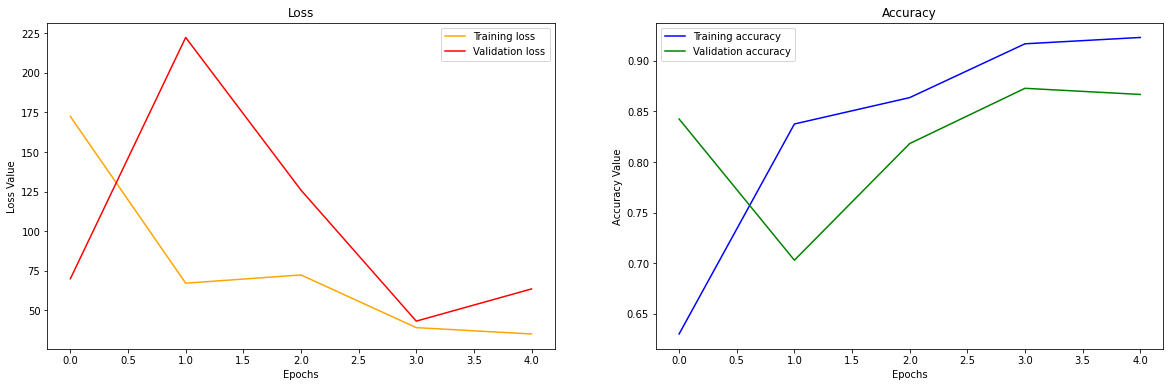

In [37]:
plot_model_hist(history=history)


Copy of l10nr065.tif


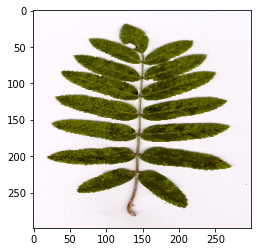

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l11nr071.tif


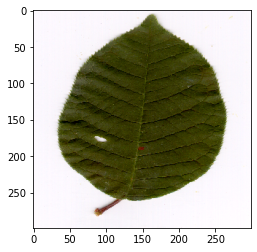

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Copy of l13nr065.tif


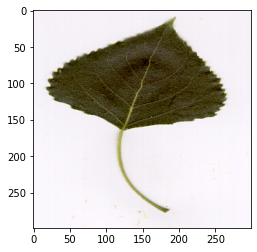

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Copy of l4nr070.tif


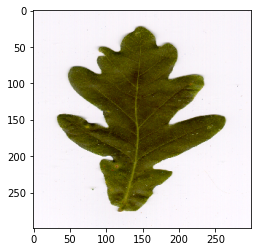

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Copy of l6nr070.tif


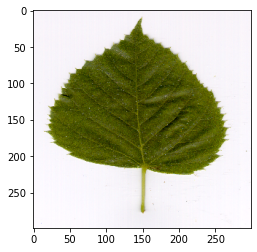

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [38]:
import cv2
import os
import numpy as np

dir_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/val'
##Predicting with model
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')

for i in os.listdir(dir_path):
   img =  image.load_img(dir_path+'/'+i,target_size=(299,299))
   print(i)
   plt.imshow(img)
   plt.show()
   X = image.img_to_array(img)
   X = np.expand_dims(X,axis=0)
   images = np.vstack([X])
   val = model.predict(images)
   print(val)
